# Employee Attrition & Productivity Risk Analysis  
### Big 4 Consulting Firms – HR Analytics Case Study

***Objective:***  
**To identify key factors driving employee attrition in Big 4–style consulting firms and build a predictive model to flag high-risk employees for proactive retention strategies.**

***Tools Used:***
**- Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)**

***Dataset:***
**Synthetic HR Analytics Dataset (Big 4 Consulting Scenario)**


## 1. IMPORT LIBRARIES

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. LOAD DATASET

In [6]:
df = pd.read_csv("E:/Data Analyst Bootcamp/Projects/Big 4/Big4_HR_Analytics_Synthetic_Dataset.csv")
df.head()


,Employee_ID,Gender,Age,Department,Job_Level,Years_At_Company,Monthly_Salary_INR,Avg_Weekly_Hours,Performance_Rating,Promotion_Last_2_Years,Training_Hours_Last_Year,Attrition
0,EMP10000,Male,35,Tax,Analyst,0.8,166294,68,2,No,30,Yes
1,EMP10001,Female,32,Tax,Senior Analyst,11.6,89068,45,3,No,76,No
2,EMP10002,Male,36,Audit,Analyst,1.5,41116,65,4,No,46,Yes
3,EMP10003,Male,44,Technology,Senior Analyst,0.9,76369,45,2,No,26,Yes
4,EMP10004,Male,39,Consulting,Analyst,1.6,128100,55,2,No,50,Yes


## 3. DATA UNDERSTANDING (EDA – Basics)

In [8]:
df.shape



(2000, 12)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee_ID               2000 non-null   object 
 1   Gender                    2000 non-null   object 
 2   Age                       2000 non-null   int64  
 3   Department                2000 non-null   object 
 4   Job_Level                 2000 non-null   object 
 5   Years_At_Company          2000 non-null   float64
 6   Monthly_Salary_INR        2000 non-null   int64  
 7   Avg_Weekly_Hours          2000 non-null   int64  
 8   Performance_Rating        2000 non-null   int64  
 9   Promotion_Last_2_Years    2000 non-null   object 
 10  Training_Hours_Last_Year  2000 non-null   int64  
 11  Attrition                 2000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 187.6+ KB


In [10]:
df.describe()

,Age,Years_At_Company,Monthly_Salary_INR,Avg_Weekly_Hours,Performance_Rating,Training_Hours_Last_Year
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,32.547000,3.062200,100508.286500,52.222500,3.24100,39.283500
std,6.920241,3.018295,44916.166043,9.893631,1.00071,22.925268
min,21.000000,0.000000,25015.000000,35.000000,1.00000,0.000000
25%,27.000000,0.900000,61532.250000,44.000000,3.00000,19.000000
50%,33.000000,2.200000,98569.500000,52.000000,3.00000,40.000000
75%,39.000000,4.225000,139390.000000,61.000000,4.00000,59.000000
max,44.000000,24.900000,179824.000000,69.000000,5.00000,79.000000


## 4. DATA CLEANING & PREPROCESSING
   

In [11]:
df.isnull().sum()

Employee_ID                 0
Gender                      0
Age                         0
Department                  0
Job_Level                   0
Years_At_Company            0
Monthly_Salary_INR          0
Avg_Weekly_Hours            0
Performance_Rating          0
Promotion_Last_2_Years      0
Training_Hours_Last_Year    0
Attrition                   0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

# 5. EXPLORATORY DATA ANALYSIS (EDA)

## 5.1 Attrition Distribution

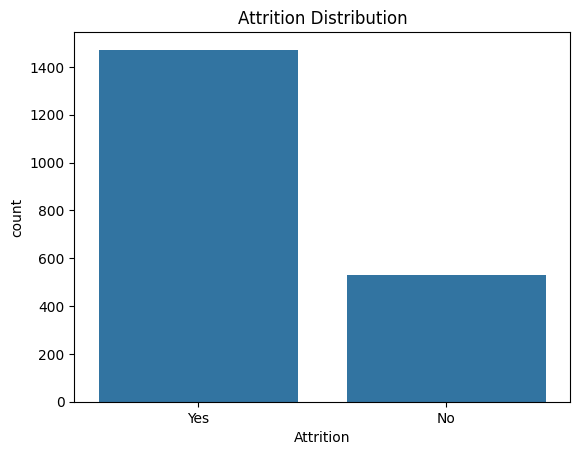

In [14]:
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

## 5.2 Attrition by Department

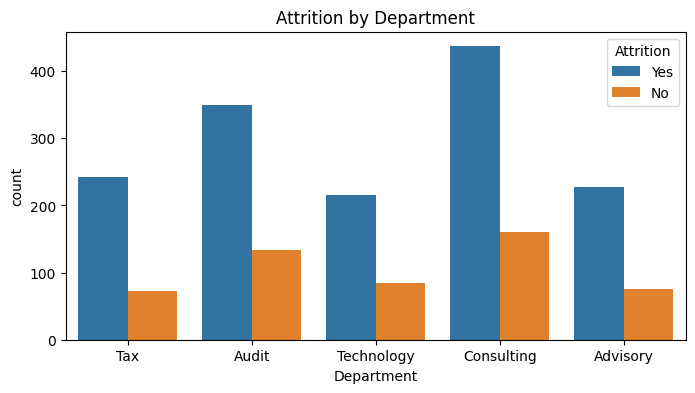

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='Department', hue= 'Attrition', data=df)
plt.title("Attrition by Department")
plt.show()

## 5.3 Salary VS Attrition

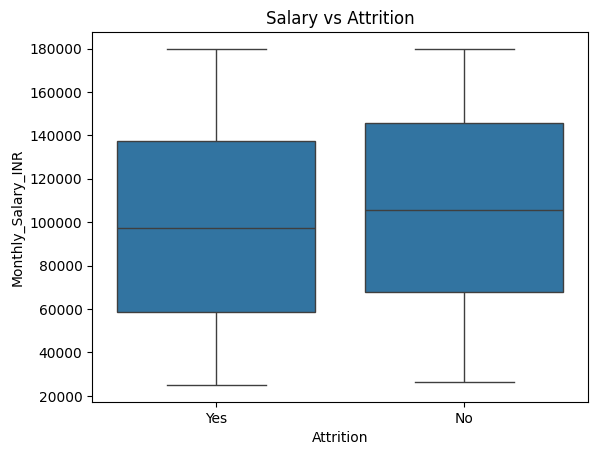

In [17]:
sns.boxplot(x='Attrition', y='Monthly_Salary_INR', data=df)
plt.title("Salary vs Attrition")
plt.show()

## 5.4 Work Hours vs Attrition

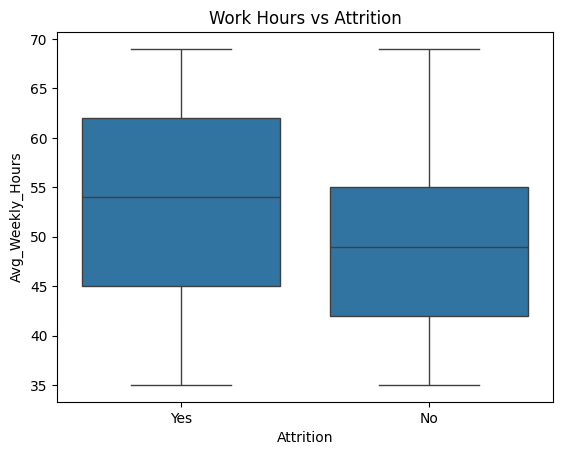

In [19]:
sns.boxplot(x='Attrition', y='Avg_Weekly_Hours', data=df)
plt.title("Work Hours vs Attrition")
plt.show()

### Key Observations:
**- Higher attrition among employees with:**

  **- Less than 2 years at the company.**
  
  **- Lower salary bands.**
  
  **- High average weekly working hours.**
  
**- Consulting & Technology departments show relatively higher exits.**


## 6. FEATURE ENGINEERING

In [21]:
le = LabelEncoder()

categorical_cols = [
    'Gender', 'Department', 'Job_Level',
    'Promotion_Last_2_Years', 'Attrition'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

## 7. MODEL PREPARATION

In [27]:
x= df.drop(['Employee_ID', 'Attrition'], axis = 1)
y= df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    x,y, test_size=0.25, random_state=42
)    

## 8. Model 1 – Logistic Regression

In [28]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.722
              precision    recall  f1-score   support

           0       0.50      0.11      0.18       139
           1       0.74      0.96      0.83       361

    accuracy                           0.72       500
   macro avg       0.62      0.53      0.51       500
weighted avg       0.67      0.72      0.65       500



***“The model effectively predicts employee attrition with high recall, making it suitable for identifying high-risk employees, though further tuning is required to improve retention classification.”***

## 9. Model 2 - Decision Tree

In [29]:
model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.728
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       139
           1       0.81      0.81      0.81       361

    accuracy                           0.73       500
   macro avg       0.66      0.66      0.66       500
weighted avg       0.73      0.73      0.73       500



***“While Logistic Regression excelled in recall for attrition cases, the Decision Tree model provided more balanced and interpretable predictions across all employee groups.”***

## 10. Feature Importance (Business Insight)

In [34]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance 


,Feature,Importance
4,Years_At_Company,0.487582
6,Avg_Weekly_Hours,0.260478
5,Monthly_Salary_INR,0.129192
9,Training_Hours_Last_Year,0.034266
7,Performance_Rating,0.032192
2,Department,0.029051
8,Promotion_Last_2_Years,0.027239
0,Gender,0.000000
1,Age,0.000000
3,Job_Level,0.000000



***Bullet Points:***

***1. Employee tenure is the strongest predictor of attrition (48.8%).***

***2. High workload significantly increases attrition risk (26.1%).***

***3. Compensation influences attrition but is not the primary driver.***

***4. Training, performance, and promotions have a moderate impact.***

***5. Demographic factors show negligible influence.***

## 11. High-Risk Employee Identification

In [36]:
df['Attrition_Probability'] = model_lr.predict_proba(x)[:,1]

high_risk = df[df['Attrition_Probability'] > 0.70]
high_risk.head()


,Employee_ID,Gender,Age,Department,Job_Level,Years_At_Company,Monthly_Salary_INR,Avg_Weekly_Hours,Performance_Rating,Promotion_Last_2_Years,Training_Hours_Last_Year,Attrition,Attrition_Probability
0,EMP10000,1,35,3,0,0.8,166294,68,2,0,30,1,0.916128
2,EMP10002,1,36,1,0,1.5,41116,65,4,0,46,1,0.914556
3,EMP10003,1,44,4,2,0.9,76369,45,2,0,26,1,0.821551
4,EMP10004,1,39,2,0,1.6,128100,55,2,0,50,1,0.847404
5,EMP10005,0,28,0,0,0.3,54655,64,1,1,19,1,0.888114


**Bullet Points:**

**1. Employees with less than 2 years of tenure show the highest attrition risk.**

**2. Excessive weekly working hours significantly increase the probability of exit.**

**3. Promotion stagnation and lower performance ratings increase the risk of attrition.**

**4. Salary alone is insufficient to retain employees under a high workload.**

**5. Predictive modeling enables proactive HR intervention.**

### 12. BUSINESS RECOMMENDATIONS
 **Data-Driven Recommendations:**
 
**1. Introduce mentorship and onboarding support for early-tenure employees, as tenure was identified as the strongest attrition driver.**

**2. Monitor and rebalance weekly working hours, particularly in consulting teams, to reduce burnout-related exits.**

**3. Implement periodic salary benchmarking and reviews after 12–18 months to address compensation dissatisfaction.**

**4. Use attrition probability scores to proactively engage high-risk employees through personalized retention strategies.**

### Conclusion:
**This project demonstrates how data analytics can proactively identify attrition risks in Big 4 consulting firms and support strategic HR decision-making using Python, machine learning, and business insights.**
